In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_files(name):
    article_path = "data/%s/article" % name
    highlights_path = "data/%s/highlights" % name
    
    articles = [x.rstrip() for x in open(article_path).readlines()]
    highlights = [x.rstrip() for x in open(highlights_path).readlines()]
    
    assert len(articles) == len(highlights)
    return articles, highlights

In [3]:
train_articles, train_highlights = read_files("train")
test_articles, test_highlights = read_files("test")
val_articles, val_highlights = read_files("val")

In [4]:
def count_words_ds(ds):
    word_count = np.zeros(len(ds))
    for i, sent in enumerate(ds):
        word_count[i] = len(sent.split(" "))
    return word_count     
    

def count_words(articles, highlights):
    word_a = count_words_ds(articles)
    word_h = count_words_ds(highlights)
    
    return word_a, word_h

In [5]:
train_a_count, train_h_count = count_words(train_articles, train_highlights)
val_a_count, val_h_count = count_words(val_articles, val_highlights)
test_a_count, test_h_count = count_words(test_articles, test_highlights)

--- Train ---


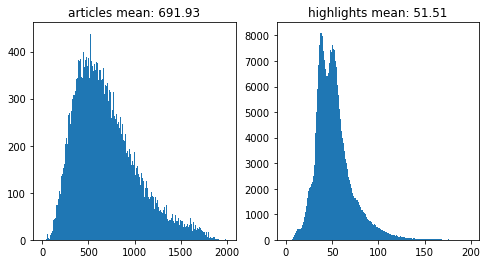

Articles mean: 691	median: 632	 min/max: [8/2347]
Highlights mean: 51	median: 48	 min/max: [4/1296]


In [6]:
def plot_show(name, count_a, count_h):
    print("--- %s ---" % name)
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    
    axs[0].hist(count_a, range(0,2000))
    axs[0].set_title("articles mean: {:.2f}".format(np.mean(count_a)))
    axs[1].hist(count_h, range(0,200))
    axs[1].set_title("highlights mean: {:.2f}".format(np.mean(count_h)))
    plt.show()
    print("Articles mean: %d\tmedian: %d\t min/max: [%d/%d]"%(np.mean(count_a), np.median(count_a),\
                                                   np.min(count_a), np.max(count_a)))
    print("Highlights mean: %d\tmedian: %d\t min/max: [%d/%d]"%(np.mean(count_h), np.median(count_h),\
                                                   np.min(count_h), np.max(count_h)))
 
plot_show("Train", train_a_count, train_h_count)

--- Test ---


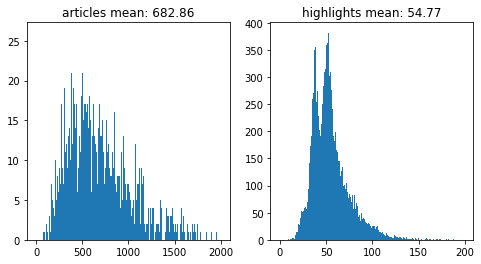

Articles mean: 682	median: 613	 min/max: [55/1954]
Highlights mean: 54	median: 51	 min/max: [9/564]


In [7]:
plot_show("Test", test_a_count, test_h_count)

--- Validation ---


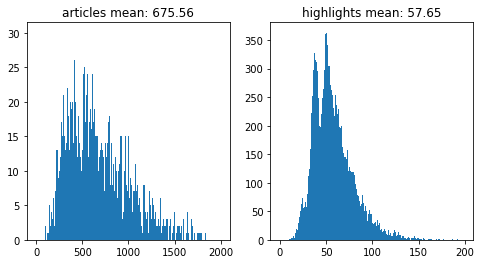

Articles mean: 675	median: 606	 min/max: [41/1917]
Highlights mean: 57	median: 53	 min/max: [10/1441]


In [8]:
plot_show("Validation", val_a_count, val_h_count)

In [9]:
from spacy.lang.en import English 

nlp = English()
nlp.add_pipe(nlp.create_pipe('sentencizer')) # updated


def split_in_sentences(text):
    doc = nlp(text)
    return [sent.string.strip() for sent in doc.sents]

In [10]:
def count_sent_ds(ds):
    word_count = np.zeros(len(ds))
    
    for i, line in enumerate(ds):

        word_count[i] = len(split_in_sentences(line))
    return word_count     
    

def count_sent(articles, highlights):
    word_a = count_sent_ds(articles)
    word_h = count_sent_ds(highlights)
    
    return word_a, word_h

def plot_show(name, count_a, count_h):
    print("--- %s ---" % name)
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    
    axs[0].hist(count_a, range(0,70))
    axs[0].set_title("articles mean: {:.2f}".format(np.mean(count_a)))
    axs[1].hist(count_h, range(0,15))
    axs[1].set_title("highlights mean: {:.2f}".format(np.mean(count_h)))
    plt.show()
    print("Articles mean: %d\tmedian: %d\t min/max: [%d/%d]"%(np.mean(count_a), np.median(count_a),\
                                                   np.min(count_a), np.max(count_a)))
    print("Highlights mean: %d\tmedian: %d\t min/max: [%d/%d]"%(np.mean(count_h), np.median(count_h),\
                                                   np.min(count_h), np.max(count_h)))

--- Train ---


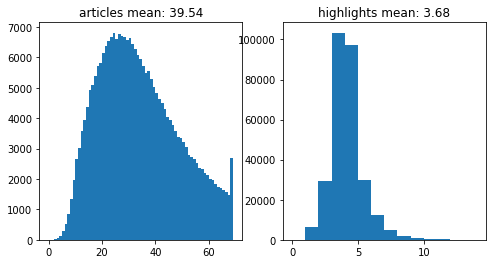

Articles mean: 39	median: 34	 min/max: [1/400]
Highlights mean: 3	median: 4	 min/max: [1/108]


In [11]:
train_a_count, train_h_count = count_sent(train_articles, train_highlights)
plot_show("Train", train_a_count, train_h_count)

--- Validation ---


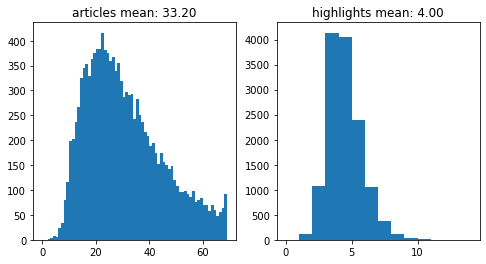

Articles mean: 33	median: 29	 min/max: [2/319]
Highlights mean: 3	median: 4	 min/max: [1/82]


In [12]:
val_a_count, val_h_count = count_sent(val_articles, val_highlights)
plot_show("Validation", val_a_count, val_h_count)

--- Test ---


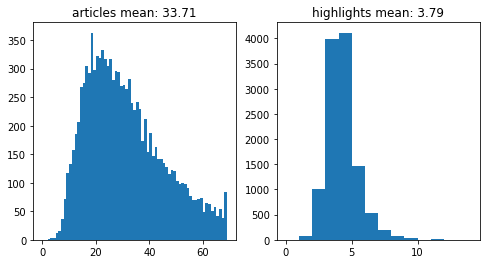

Articles mean: 33	median: 29	 min/max: [2/231]
Highlights mean: 3	median: 4	 min/max: [1/36]


In [13]:
test_a_count, test_h_count = count_sent(test_articles, test_highlights)
plot_show("Test", test_a_count, test_h_count)